# Import Packages

In [5]:
import numpy as np
import pandas as pd

import matplotlib
import matplotlib.dates as mdates
import matplotlib.pyplot as plt
# 옵션 설정
matplotlib.rcParams['font.family'] = 'Malgun Gothic'
matplotlib.rcParams['font.size'] = 10
matplotlib.rcParams['axes.unicode_minus'] = False

import seaborn as sns # seaborn 사용에 대한 내용도 추후 정리 후 추가

from datetime import datetime

### 사용 가능한 폰트의 확인

In [5]:
[f.name for f in matplotlib.font_manager.fontManager.ttflist]

['DejaVu Sans Display',
 'STIXSizeOneSym',
 'DejaVu Sans',
 'STIXGeneral',
 'cmmi10',
 'DejaVu Serif',
 'STIXSizeThreeSym',
 'cmr10',
 'STIXGeneral',
 'cmsy10',
 'cmb10',
 'cmtt10',
 'DejaVu Sans',
 'cmex10',
 'DejaVu Serif',
 'STIXNonUnicode',
 'DejaVu Sans Mono',
 'STIXSizeFiveSym',
 'STIXNonUnicode',
 'STIXSizeThreeSym',
 'STIXSizeTwoSym',
 'STIXGeneral',
 'STIXNonUnicode',
 'STIXSizeTwoSym',
 'cmss10',
 'DejaVu Sans Mono',
 'DejaVu Serif Display',
 'STIXSizeFourSym',
 'DejaVu Serif',
 'DejaVu Sans',
 'STIXSizeFourSym',
 'DejaVu Sans Mono',
 'STIXSizeOneSym',
 'DejaVu Sans Mono',
 'STIXNonUnicode',
 'DejaVu Sans',
 'STIXGeneral',
 'DejaVu Serif',
 'Georgia',
 'Candara',
 'Verdana',
 'Microsoft Tai Le',
 'Corbel',
 'Segoe UI',
 'Corbel',
 'Ink Free',
 'Ebrima',
 'Batang',
 'Comic Sans MS',
 'Malgun Gothic',
 'Lucida Sans Unicode',
 'Segoe UI Symbol',
 'Microsoft Himalaya',
 'Symbol',
 'Nirmala UI',
 'Microsoft YaHei',
 'Calibri',
 'Candara',
 'Yu Gothic',
 'Cambria',
 'Nirmala UI',
 

# Line Graph

In [188]:
df_1 = fdr.DataReader('060150', '2021')
df_2 = fdr.DataReader('149980', '2021')

df_1.to_csv('./ent_2021.csv')
df_2.to_csv('./hironic_2021.csv')

In [2]:
ent_df = pd.read_csv('./ent_2021.csv', nrows = 100)
hironic_df = pd.read_csv('./hironic_2021.csv', nrows = 100)

ent_df['Date'] = ent_df['Date'].apply(lambda x: datetime.strptime(x, '%Y-%m-%d'))
hironic_df['Date'] = hironic_df['Date'].apply(lambda x: datetime.strptime(x, '%Y-%m-%d'))

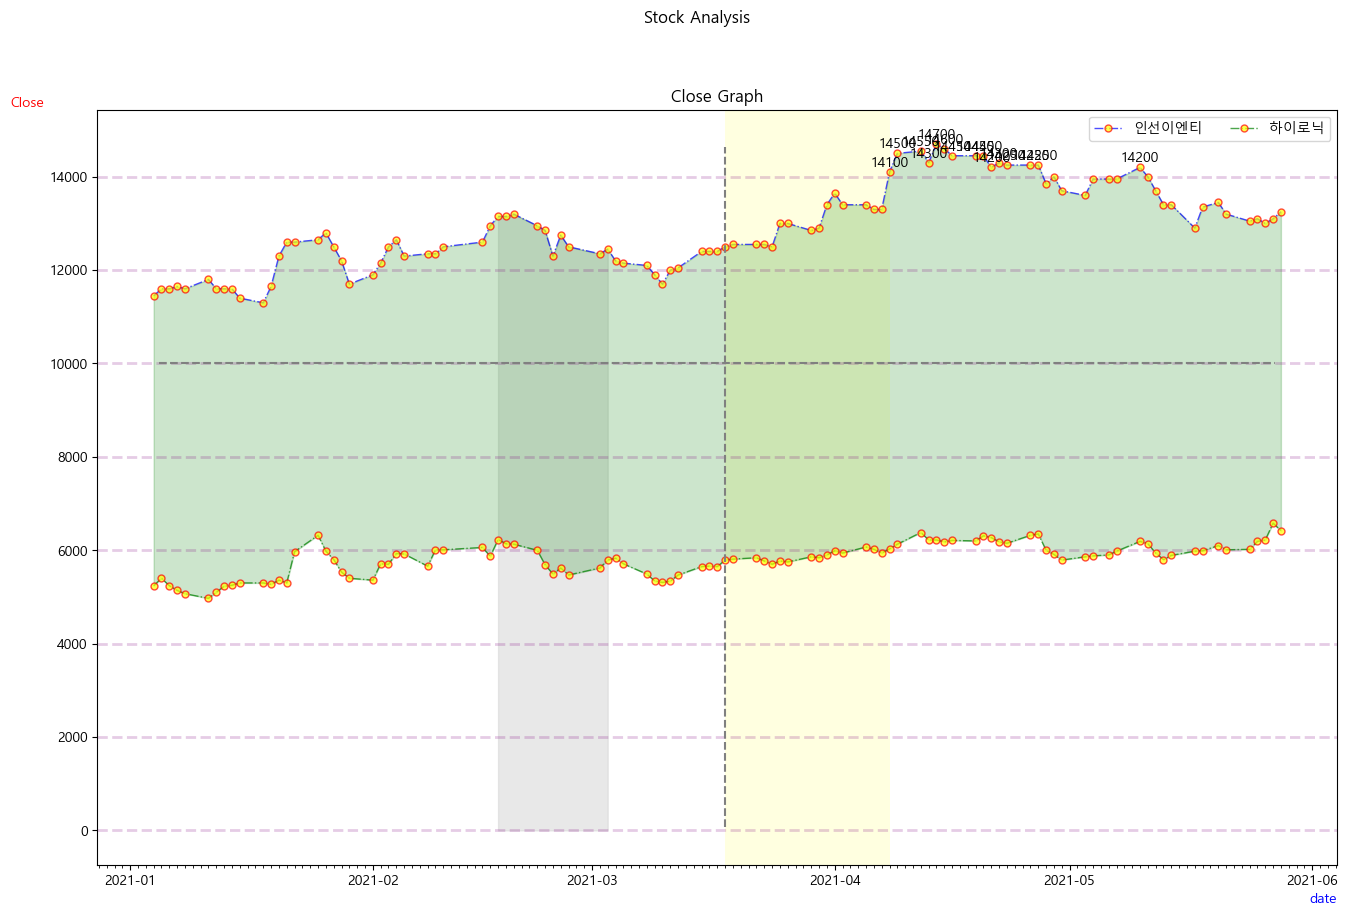

In [6]:
# figure와 ax 설정
fig, axes = plt.subplots(1, 1, figsize = (16, 10), dpi = 100)

axes.plot(ent_df['Date'],  # x축으로 설정할 데이터
          ent_df['Close'], # y축으로 설정할 데이터
          marker = 'o',
          markersize = 5,
          markerfacecolor = 'yellow',
          markeredgecolor = 'red',
          linestyle = '-.',
          linewidth = 1,
          alpha = 0.7,
          color = 'b',
          label = '인선이엔티'
         )

# 여러 그래프를 한 축에 그리고 싶을 경우
axes.plot(hironic_df['Date'],  # x축으로 설정할 데이터
          hironic_df['Close'], # y축으로 설정할 데이터
          marker = 'o',
          markersize = 5,
          markerfacecolor = 'yellow',
          markeredgecolor = 'red',
          linestyle = '-.',
          linewidth = 1,
          alpha = 0.7,
          color = 'g',
          label = '하이로닉'
         )

# 수평/수직선 그리기
axes.axhline(10000,
             0.05, 0.95,
             color = 'gray',
             linestyle = '--')
axes.axvline(ent_df['Date'][50],
             0.05, 0.95,
             color = 'gray',
             linestyle = '--')

# 그래프 영역 색 입히기
axes.fill_between(ent_df['Date'][30:40],
                  ent_df['Close'][30:40],
                  color = 'lightgray',
                  alpha = 0.5)

# 그래프 구간 색 입히기
start = ent_df['Date'][50]
end = ent_df['Date'][65]
axes.axvspan(start, end,
             facecolor = 'lightyellow')
axes.fill_between(ent_df['Date'],
                  ent_df['Close'],
                  hironic_df['Close'],
                  color = 'g',
                  alpha = 0.2)

# text 작성
text_data = ent_df.loc[ent_df['Close'] > 14000][['Date', 'Close']].copy()
for x, y in text_data.values:
    axes.text(x, # 텍스트 작성할 x 좌표
              y + 50, # 텍스트 작성할 y 좌표
              y, # 텍스트 내용
              ha = 'center',
              va = 'bottom') # 좌표에서 텍스트 포지션 설정

# 세부사항 설정
fig.suptitle('Stock Analysis')
# axes.set(xlabel = 'date', ylabel = 'Close', title = '')
axes.set_title('Close Graph')
axes.set_xlabel('date',
                color = 'blue',
                loc = 'right' # loc = (center, left, right)
               )
axes.set_ylabel('Close',
                color = 'red',
                rotation = 'horizontal',
                loc = 'top' # loc = (center, bottom, top)
               )

# tick 설정
axes.xaxis.set_major_locator(mdates.MonthLocator(interval = 1))
axes.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
axes.xaxis.set_minor_locator(mdates.DayLocator())

axes.grid(axis = 'y',
          color = 'purple',
          alpha = 0.2,
          linewidth = 2,
          linestyle = '--'
         )
# axes.set_xlim(0, 100)
# axes.set_ylim(4000, 8000)
axes.legend(loc = 'upper right',
            ncol = 2)

# plt.savefig(save_path, dpi = 300)
plt.show()

### ticks에 대한 코드 정리

In [198]:
ent_df['Date'] = ent_df['Date'].apply(lambda x: datetime.strptime(x, '%Y-%m-%d'))

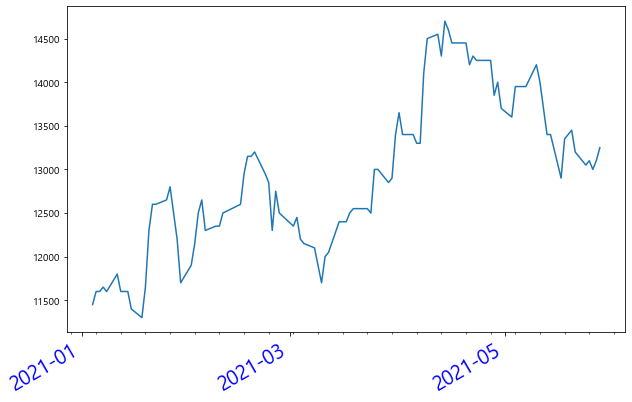

In [235]:
fig , ax = plt.subplots(1, 1, figsize = (10, 6))

ax.plot(ent_df['Date'], ent_df['Close'])

# ax.tick_params(axis = 'x',
#                labelsize = 15,
#                length = 20,
#                width = 3,
#                bottom = False, labelbottom = False,
#                top = True, labeltop = True,
#                rotation = 30,
#                color = 'r',
#                colors = 'b')
# ax.tick_params(axis = 'y',
#                left = False)

for label in ax.get_xticklabels(which = 'major'):
    label.set(rotation = 30, ha = 'right', color = 'b', size = 20)

# mdates.MonthLocaotr (YearLocator, MonthLocator, WeekdayLocator, DayLocator, HourLocator, MinuteLocator, SecondLocator)
ax.xaxis.set_major_locator(mdates.MonthLocator(interval = 2))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
# date_form = mdates.DateFormatter('%m/%Y')
# ax.xaxis.set_major_formatter(date_form)

ax.xaxis.set_minor_locator(mdates.WeekdayLocator())

# Bar Graph

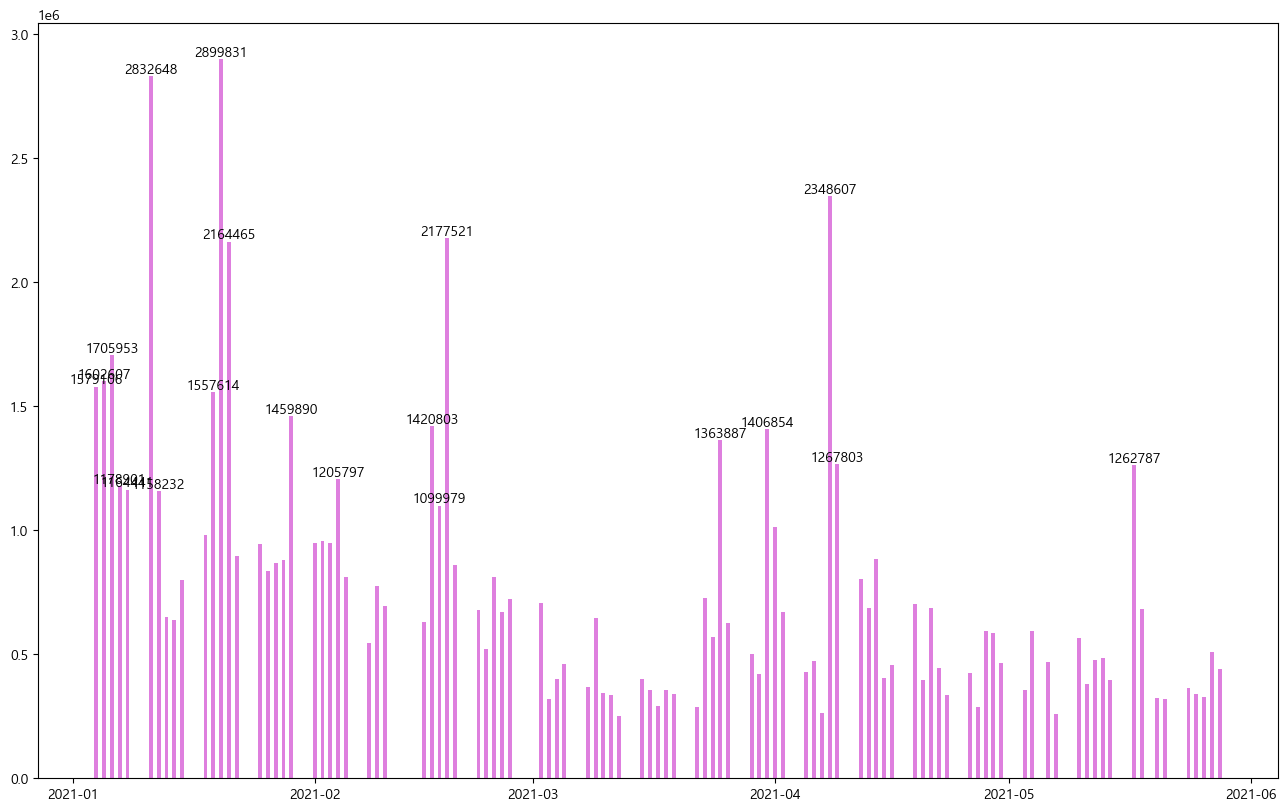

In [276]:
fig, ax = plt.subplots(1, 1, figsize = (16, 10), dpi = 100)

bar1 = ax.bar(ent_df['Date'],
               ent_df['Volume'],
               width = 0.5, # 막대의 두께, barh에서는 height
               color = 'm',
               alpha = 0.5)

# text 삽입
for idx, vol in ent_df.loc[ent_df['Volume'] > ent_df['Volume'].quantile(0.8)][['Date', 'Volume']].values:
    ax.text(idx, vol + 1000, vol,
            ha = 'center',
            va = 'bottom')

<BarContainer object of 100 artists>

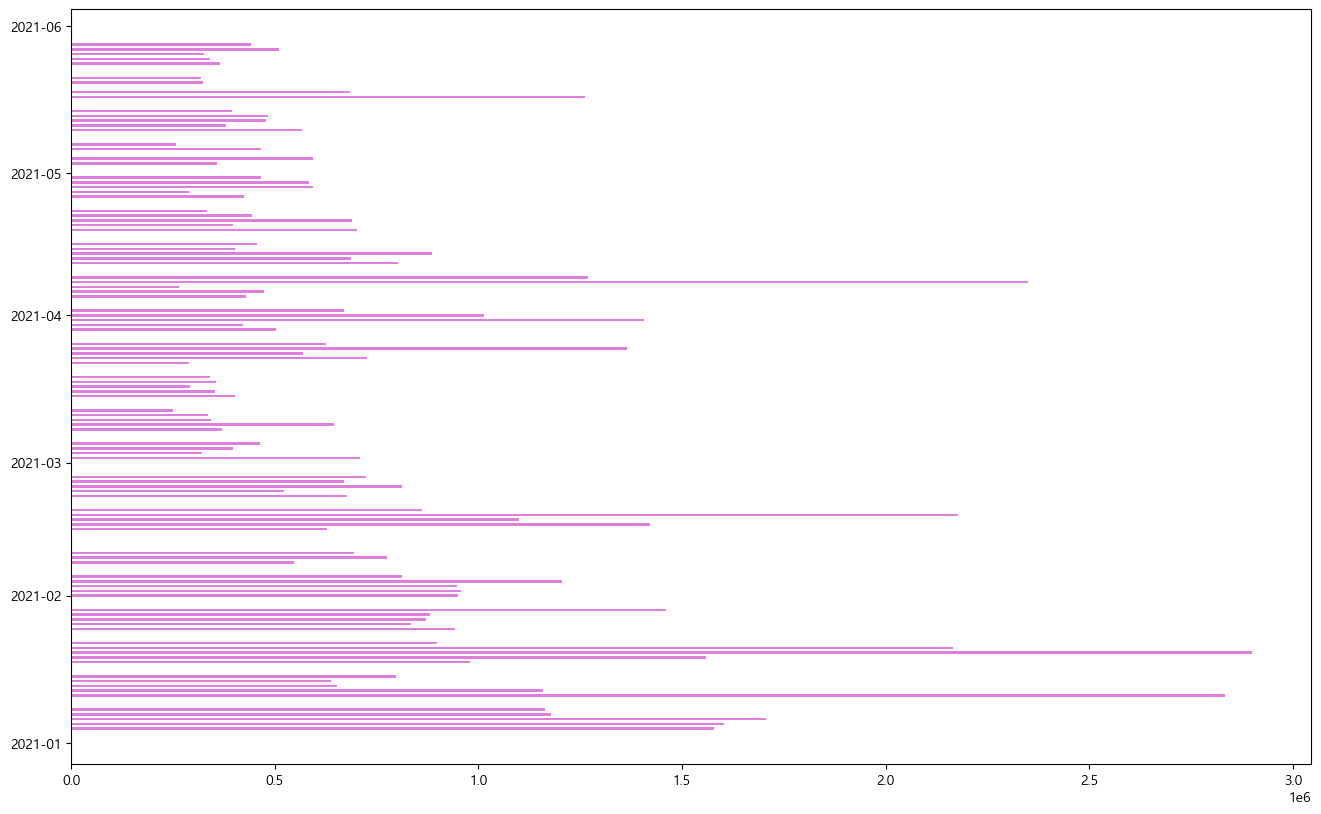

In [257]:
fig, ax = plt.subplots(1, 1, figsize = (16, 10), dpi = 100)

ax.barh(ent_df['Date'],
        ent_df['Volume'],
        height = 0.5, # 막대의 두께, bar에서는 width
        color = 'm',
        alpha = 0.5)

### Stacked Bar & Multiple Bar

In [291]:
sample_df = pd.read_csv('./bar_sample_data.csv', index_col = 0)

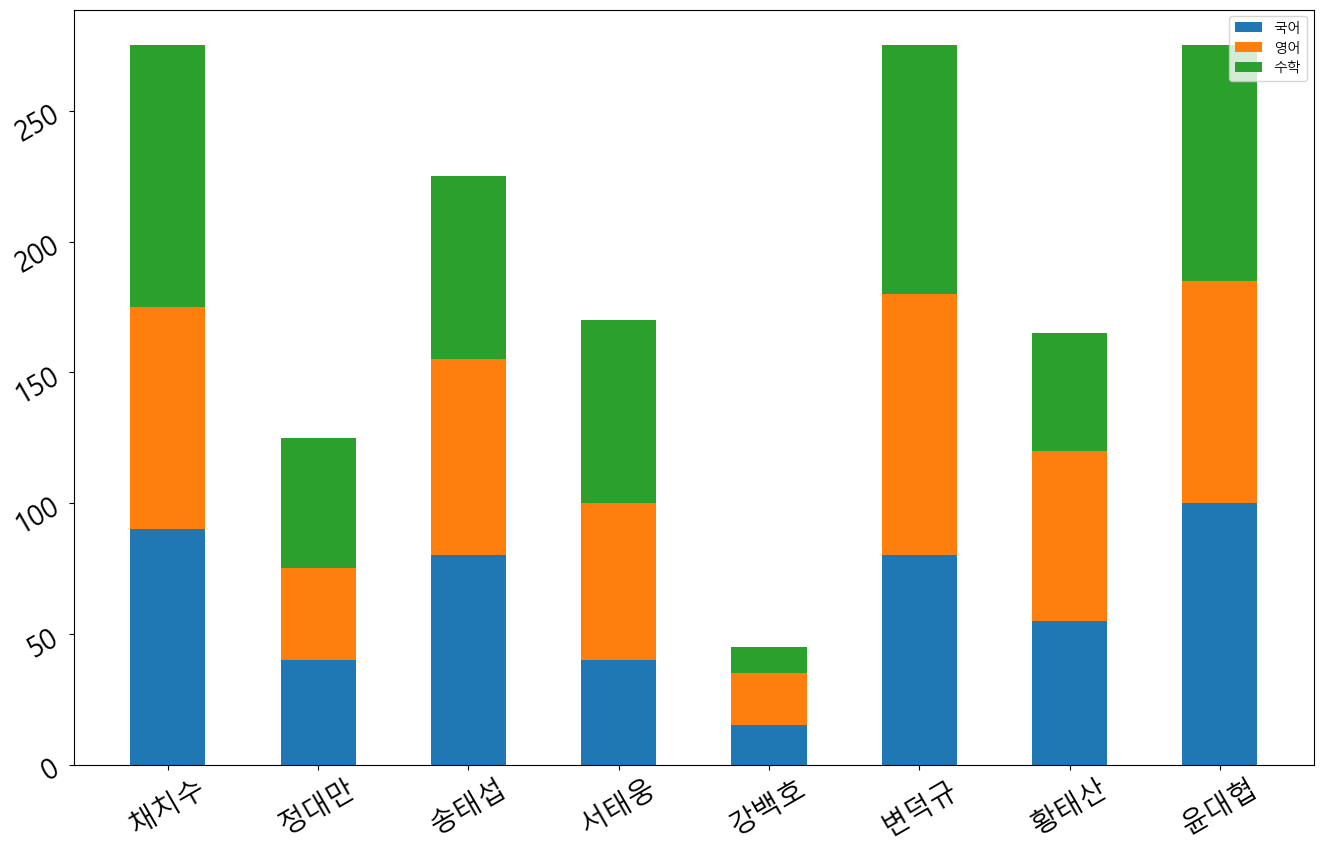

In [309]:
fig, ax = plt.subplots(1, 1, figsize = (16, 10), dpi = 100)

ax.bar(sample_df['이름'],
       sample_df['국어'],
       width = 0.5,
       label = '국어')
ax.bar(sample_df['이름'],
       sample_df['영어'],
       bottom = df['국어'],
       width = 0.5,
       label = '영어')
ax.bar(sample_df['이름'],
       sample_df['수학'],
       bottom = df['국어'] + df['영어'],
       width = 0.5,
       label = '수학')

ax.legend(loc = 'upper right')
ax.tick_params(rotation = 30,
               labelsize = 20)

plt.show()

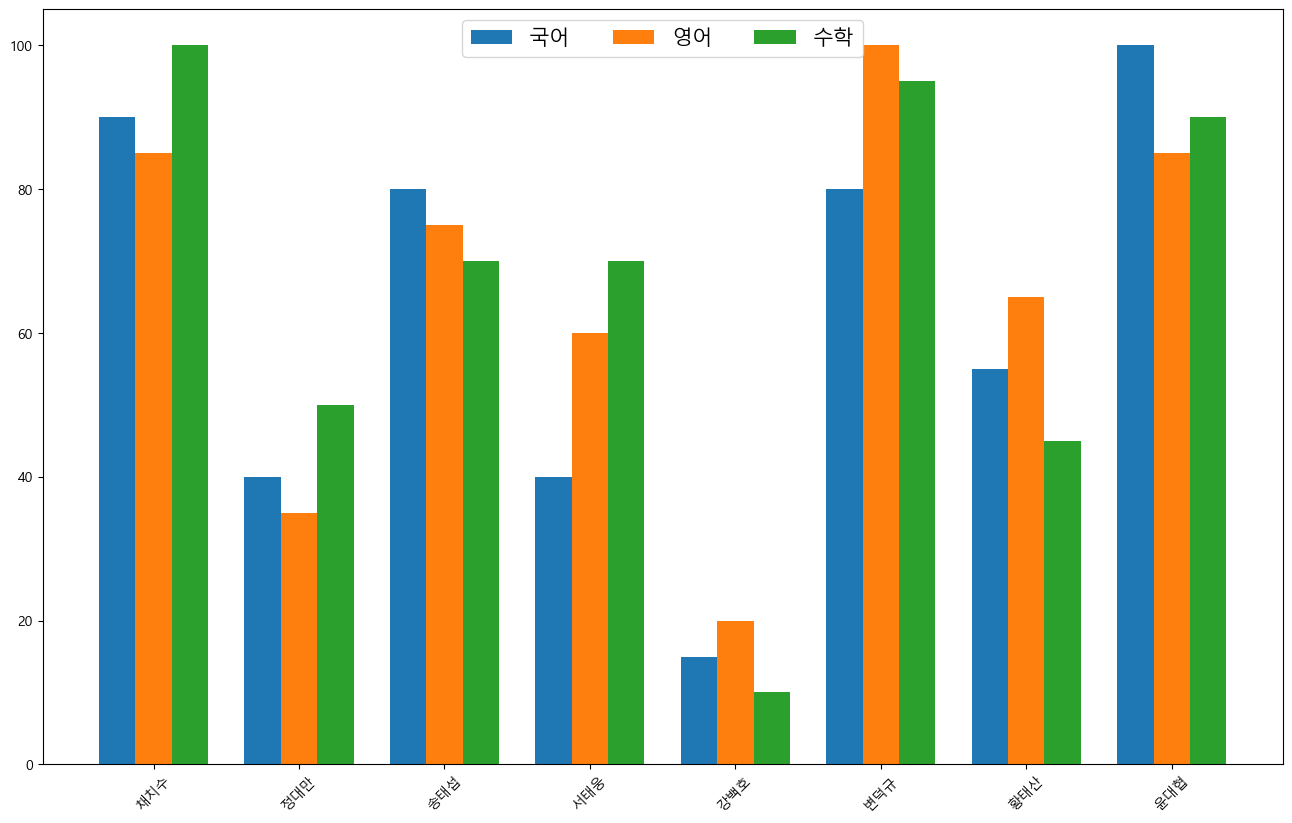

In [315]:
fig, ax = plt.subplots(1, 1, figsize = (16, 10), dpi = 100)

index = np.arange(len(sample_df))
width = 0.25

ax.bar(index-width, df['국어'], width = width, label = '국어')
ax.bar(index, df['영어'], width = width, label = '영어')
ax.bar(index+width, df['수학'], width = width, label = '수학')

ax.set_xticks(np.arange(len(sample_df)))
ax.set_xticklabels(sample_df['이름'], rotation = 45)

ax.legend(ncol = 3,
          loc = 'upper center',
          fontsize = 15)

plt.show()

# Pie Graph

In [323]:
group_df = pd.DataFrame(sample_df.groupby(['학교']).size())

[None, None]

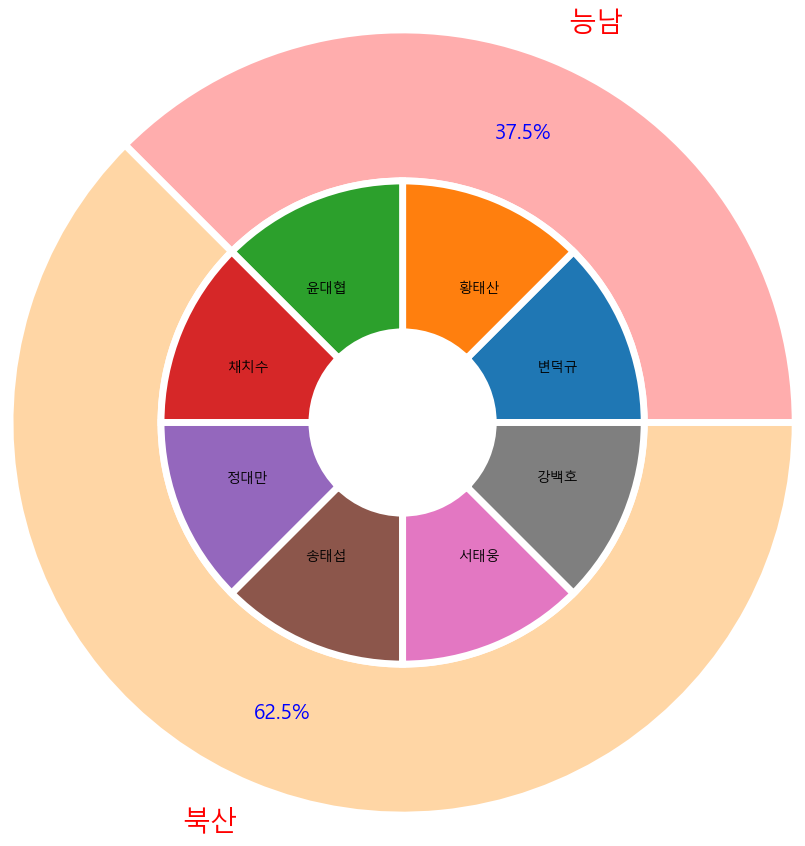

In [382]:
fig, ax = plt.subplots(1, 1, figsize = (16, 10), dpi = 100)

patches, texts, autotexts = ax.pie(group_df[0],
                                   labels = group_df.index,
                                   labeldistance = 1.1,
                                   autopct = '%.1f%%', # 부채꼴 안에 표시될 숫자의 형식 지정
                                   startangle = 0,
                                   counterclock = True, # 시작점으로부터의 방향 설정
                                   colors = ['#ffadad', '#ffd6a5'],
                                   wedgeprops = {'width': 0.5,
                                                 'edgecolor': 'w',
                                                 'linewidth': 5
                                                }, # 부채꼴 영역 스타일 설정
                                   pctdistance = 0.8, # pct 값의 위치, 중앙에서부터 비율로 표기
#                                    explode = [0.1, 0.1],
#                                    shadow = True,
                                   radius = 1.3
                                  )

ax.pie([1] * 8,
       labels = sample_df.sort_values('학교')['이름'],
       labeldistance = 0.6,
       wedgeprops = {'width': 0.5,
                     'edgecolor': 'w',
                     'linewidth': 5},
       radius = 1.3 - 0.5)

# 각 text의 옵션 설정
[text.set_color('red') for text in texts]
[text.set_size(20) for text in texts]
[autotext.set_color('blue') for autotext in autotexts]
[autotext.set_size(15) for autotext in autotexts]

# Scatter Graph

# Heatmap Graph

# Twin Axis

In [383]:
# ax.twinx() --- 이를 통해서 x축을 공유하는 그래프를 작성할 수 있다.